# Pima Diabetes Prediction Using Machine Learning

Aim: To predict the patient is diabetic or not.

The following basic steps are:
1. Ingest data
2. Data preprocessing(cleaning)
3. EDA( Exploratory Data Analysis)
4. Data Normalization, Encoding
5. Column Selection( Using correlation information)
6. Split data to Training and Testing (0.8/0.2)
7. Create and initialise models ( fit training to the model)
8. Evaluate Accuracy Parameters
9. Evaluate F score and other patameters

In [1]:
# Import necessary modules and setup otehr parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Step 1. Ingest Data from file: prima-diabetes.csv  (check file name)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df=pd.read_csv('pima-diabetes-data.csv')
df.columns=['p_count','PGC','DBP','Tricep','SerumInsulin','BMI','DPF','Age','Class']
df

,p_count,PGC,DBP,Tricep,SerumInsulin,BMI,DPF,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [3]:
df.shape   #gives count of rows and columns

(767, 9)

In [4]:
df.isnull().sum()

p_count         0
PGC             0
DBP             0
Tricep          0
SerumInsulin    0
BMI             0
DPF             0
Age             0
Class           0
dtype: int64

In [5]:
df.info()    # display info of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_count       767 non-null    int64  
 1   PGC           767 non-null    int64  
 2   DBP           767 non-null    int64  
 3   Tricep        767 non-null    int64  
 4   SerumInsulin  767 non-null    int64  
 5   BMI           767 non-null    float64
 6   DPF           767 non-null    float64
 7   Age           767 non-null    int64  
 8   Class         767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()   #prints statistical info

,p_count,PGC,DBP,Tricep,SerumInsulin,BMI,DPF,Age,Class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#deleting all na's if present
df.dropna(axis=1).shape

(767, 9)

In [8]:
df['Class'].value_counts() # count o's and 1's in the class column

0    500
1    267
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

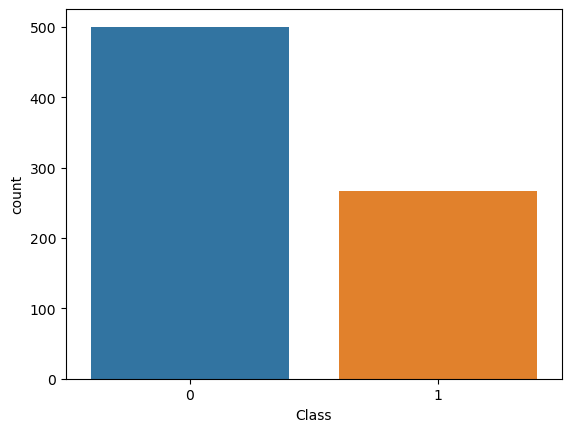

In [12]:
sns.countplot(x='Class',data=df)

In [14]:
# display categorical values
category=df.select_dtypes(include='object').keys()
category

Index([], dtype='object')

In [20]:
#splitting dataset into features(independent: X) and outcomes(dependent: Y)
X = df.iloc[:,:7].values
y = df.iloc[:,8].values
print(X,y)

[[1.00e+00 8.50e+01 6.60e+01 ... 0.00e+00 2.66e+01 3.51e-01]
 [8.00e+00 1.83e+02 6.40e+01 ... 0.00e+00 2.33e+01 6.72e-01]
 [1.00e+00 8.90e+01 6.60e+01 ... 9.40e+01 2.81e+01 1.67e-01]
 ...
 [5.00e+00 1.21e+02 7.20e+01 ... 1.12e+02 2.62e+01 2.45e-01]
 [1.00e+00 1.26e+02 6.00e+01 ... 0.00e+00 3.01e+01 3.49e-01]
 [1.00e+00 9.30e+01 7.00e+01 ... 0.00e+00 3.04e+01 3.15e-01]] [0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1
 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1
 0 1 0 1 1 0 1 0 0 1 0 1 1 0

In [26]:
#use train_test_split method , split ratios is 80:20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [28]:
# features scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

Data Processing

In [29]:
#checking for any null value
df.isnull().sum()

p_count         0
PGC             0
DBP             0
Tricep          0
SerumInsulin    0
BMI             0
DPF             0
Age             0
Class           0
dtype: int64

In [31]:
#check the datatype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_count       767 non-null    int64  
 1   PGC           767 non-null    int64  
 2   DBP           767 non-null    int64  
 3   Tricep        767 non-null    int64  
 4   SerumInsulin  767 non-null    int64  
 5   BMI           767 non-null    float64
 6   DPF           767 non-null    float64
 7   Age           767 non-null    int64  
 8   Class         767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
# again display stattistical attributes to check their info
df.describe()

,p_count,PGC,DBP,Tricep,SerumInsulin,BMI,DPF,Age,Class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
# display correlation matrix
df.corr()

,p_count,PGC,DBP,Tricep,SerumInsulin,BMI,DPF,Age,Class
p_count,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
PGC,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
DBP,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
Tricep,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
SerumInsulin,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
BMI,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
DPF,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
Age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
Class,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


Data Visualization

<Axes: >

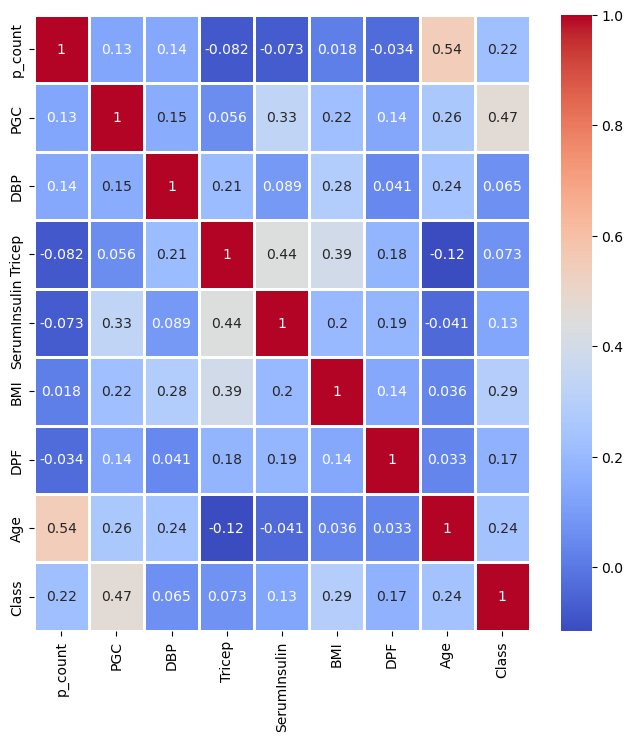

In [44]:
# heatmap of correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidth=2)

<Axes: >

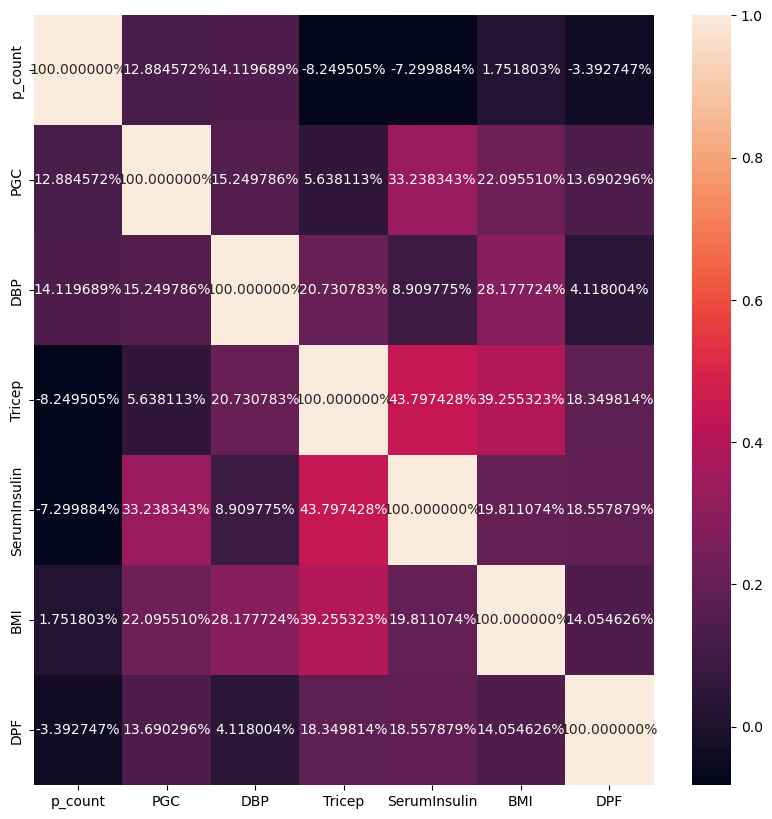

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,:7].corr(),annot=True,fmt='0%')

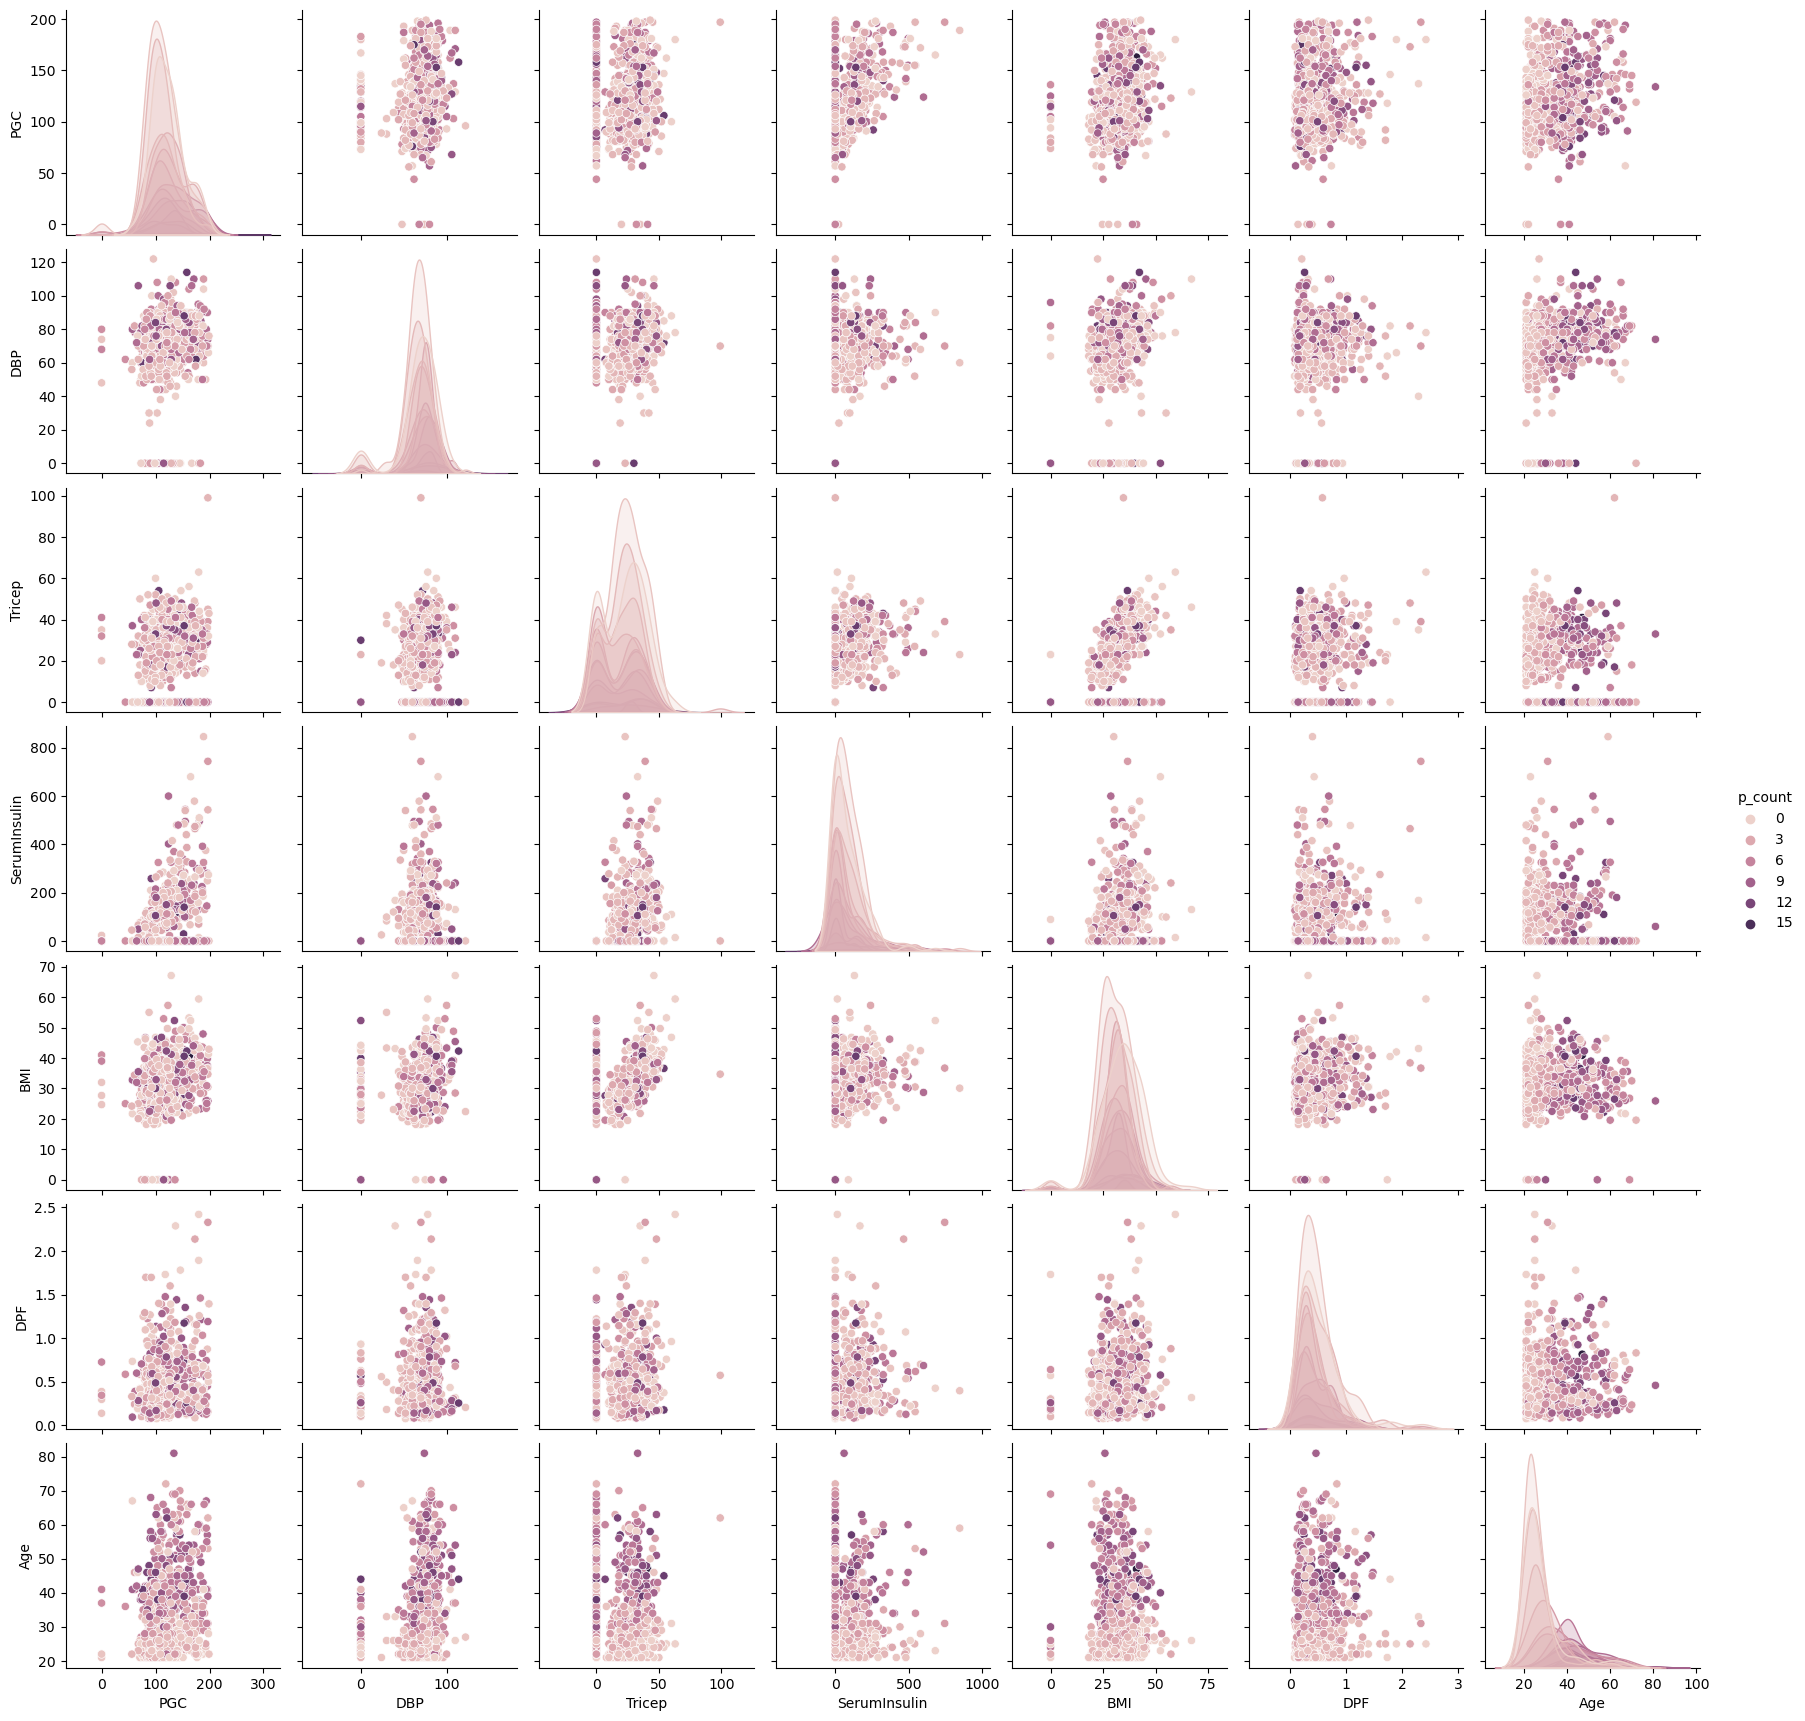

In [49]:
sns.pairplot(df.iloc[:,:8],hue='p_count')

Data Analysis

In [57]:
# Create the function for the machine learnings
def models(X_train,y_train):
    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,y_train)
    
    
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,y_train)
    
    
    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(criterion='entropy',max_features='sqrt', min_samples_split=4,n_estimators=20,random_state=0)
    forest.fit(X_train,y_train)
    
    
    # Support Vector Classifier
    from sklearn.svm import SVC
    svc_classifier = SVC(C=1,kernel='linear')
    svc_classifier.fit(X_train,y_train)
    
    
    # K-Nearest Neighbors Classifiers
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    
    
    # Naive Bayes Classifier
    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb.fit(X_train,y_train)
    
    #Print the models accuracy on the training data
    print('[0]Logistic Regression Training Accuracy: ',log.score(X_train,y_train))
    print('[1]Decision Tree Classifier Training Accuracy: ',tree.score(X_train,y_train))
    print('[2]Random Forest Classifier Training Accuracy: ',forest.score(X_train,y_train))
    print('[3]Support Vector Classifier Training Accuracy: ',svc_classifier.score(X_train,y_train))
    print('[4]K-Nearest Neighbor Classifier Training Accuracy: ',knn.score(X_train,y_train))
    print('[5]Naive Bayes Classifier Training Accuracy: ',nb.score(X_train,y_train))
    
    return log,tree,forest,svc_classifier,knn,nb
    
    

In [58]:
#Display the training accuracy of all the models
model=models(X_train,y_train)

[0]Logistic Regression Training Accuracy:  0.7797716150081566
[1]Decision Tree Classifier Training Accuracy:  1.0
[2]Random Forest Classifier Training Accuracy:  0.99836867862969
[3]Support Vector Classifier Training Accuracy:  0.7814029363784666
[4]K-Nearest Neighbor Classifier Training Accuracy:  0.8466557911908646
[5]Naive Bayes Classifier Training Accuracy:  0.7618270799347472


In [59]:
#Test all models to obtain the most accurate model by generating their confusion matrix and obtaining sensitivity and specificity
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    print('Model',i)
    cm = confusion_matrix(y_test,model[i].predict(X_test))
    TP=cm[0][0]
    TN=cm[1][1]
    FN=cm[1][0]
    FP=cm[0][1]

    print("The Confusion Matrix is \n",cm)
    print('Testing Accuracy = ',(TP+TN)/(TP+TN+FP+FN))
    print('Sensitivity = ',TP/(TP+FN))
    print('Specificity = ',TN/(TN+FP))
    print()

Model 0
The Confusion Matrix is 
 [[90 11]
 [22 31]]
Testing Accuracy =  0.7857142857142857
Sensitivity =  0.8035714285714286
Specificity =  0.7380952380952381

Model 1
The Confusion Matrix is 
 [[83 18]
 [23 30]]
Testing Accuracy =  0.7337662337662337
Sensitivity =  0.7830188679245284
Specificity =  0.625

Model 2
The Confusion Matrix is 
 [[88 13]
 [21 32]]
Testing Accuracy =  0.7792207792207793
Sensitivity =  0.8073394495412844
Specificity =  0.7111111111111111

Model 3
The Confusion Matrix is 
 [[91 10]
 [22 31]]
Testing Accuracy =  0.7922077922077922
Sensitivity =  0.8053097345132744
Specificity =  0.7560975609756098

Model 4
The Confusion Matrix is 
 [[84 17]
 [26 27]]
Testing Accuracy =  0.7207792207792207
Sensitivity =  0.7636363636363637
Specificity =  0.6136363636363636

Model 5
The Confusion Matrix is 
 [[88 13]
 [17 36]]
Testing Accuracy =  0.8051948051948052
Sensitivity =  0.8380952380952381
Specificity =  0.7346938775510204

